In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm #패키지 리소스(자원) 중 폰트 관련 모음
import matplotlib as mpl

In [2]:
font_path =r'C:\Windows\Fonts\gulim.ttc'
#matplotlib 패키지에 한글폰트 설정
myfont = fm.FontProperties(fname= font_path).get_name()
mpl.rc('font', family = myfont)

In [3]:
# ================================================================================
# 함수 이름 : clean
# 함수 기능 : 행과 열 인덱스를 맞춤
# 변     수 : 파일을 지정해야하여 변수로 설정해야함
# ----------------------------------------------------------
def clean(file):
    # 1열은 필요없으므로 건너뛴 상태로 csv파일 부름
    F = pd.read_csv(file, skiprows = 1)       

    # 형변환
    F['특성별(1)'] = F['특성별(1)'].astype('category')
    F['특성별(2)'] = F['특성별(2)'].astype('category')

    # 멀티인덱스 설정
    F.set_index(['특성별(1)','특성별(2)'], inplace = True)

    # 정보 확인
    F.info()                

    return F


# ================================================================================


In [4]:
# --------------------------------------------------------------------------
# 함수 이름 : select
# 매개 변수 : F (데이터 프레임 변수 이름), indexC (행 인덱스 이름)
# 함수 기능 : 데이터 프레임에서 해당 인덱스 열을 뽑아줌 (DataFrame 형식)
# --------------------------------------------------------------------------
def select(F, indexC):
        result = F.xs(indexC, level = 0)
        return result

In [5]:
kind_student = '../DATA/학생_사이버폭력_목격_경험_20240119171311.csv'
situation_student = '../DATA/학생_사이버폭력_목격_여부_및_목격_상황_20240119171208.csv'
experience_student = '../DATA/학생_사이버폭력_목격_경험_유형_수_20240119171445.csv'



In [6]:
kind_student = clean(kind_student)
situation_student = clean(situation_student)
experience_student = clean(experience_student)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 30 entries, ('전체', '소계') to ('사이버폭력 예방교육별', '경험 없음')
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사이버 언어폭력  30 non-null     float64
 1   사이버 명예훼손  30 non-null     float64
 2   사이버 스토킹   30 non-null     float64
 3   사이버 성폭력   30 non-null     float64
 4   신상정보 유출   30 non-null     float64
 5   사이버 따돌림   30 non-null     float64
 6   사이버 갈취    30 non-null     float64
 7   사이버 강요    30 non-null     float64
dtypes: float64(8)
memory usage: 3.8 KB
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 31 entries, ('특성별(1)', '특성별(2)') to ('사이버폭력 예방교육별', '경험 없음')
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   목격 경험 있음    31 non-null     object
 1   목격 경험 있음.1  31 non-null     object
 2   목격 경험 있음.2  31 non-null     object
 3   목격 경험 있음.3  31 non-null     object
 4   목격 경험 없음    31 non-null     object
dtypes: obje

In [7]:
#experience_student = 목격 경험/유형 수
exage = select(experience_student, '학령별')
exschoolkind = select(experience_student, '학교특성별')
exgrade = select(experience_student, '학업성적별')

Text(0, 0.5, '응답(%)')

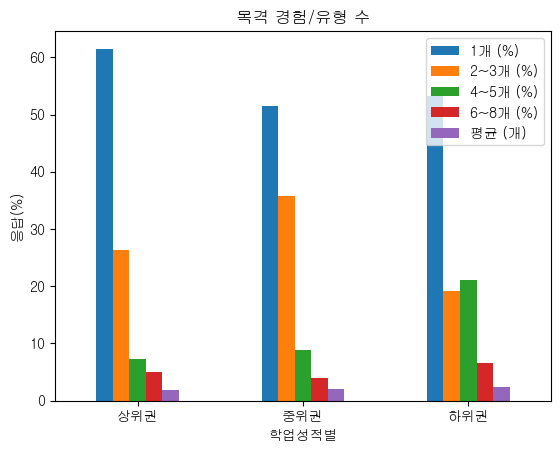

In [8]:
exgrade.plot(kind = 'bar', rot = 0)
plt.title('목격 경험/유형 수')
plt.xlabel('학업성적별')
plt.ylabel('응답(%)')

Text(0.5, 1.0, '목격 경험/유형 수')

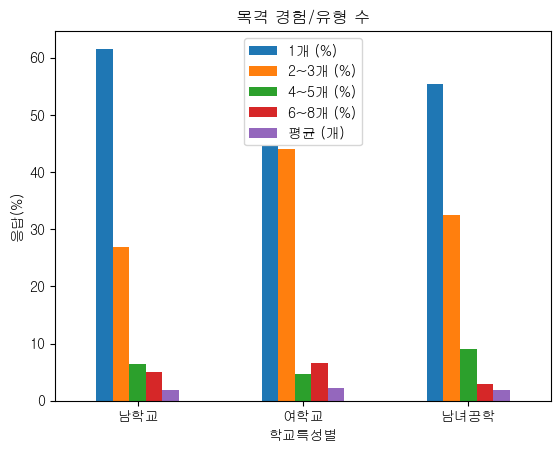

In [9]:

exschoolkind.plot(kind = 'bar', rot = 0)
plt.xlabel('학교특성별')
plt.ylabel('응답(%)')
plt.title('목격 경험/유형 수')


Text(0, 0.5, '응답(%)')

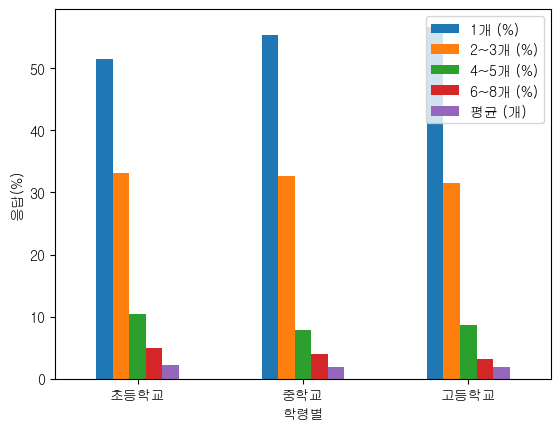

In [10]:
exage.plot(kind = 'bar', rot = 0)
plt.xlabel('학령별')
plt.ylabel('응답(%)')


In [11]:
#situation_student = 목격 여부 및 상황

ssage = select(situation_student, '학령별')
ssschoolkind = select(situation_student, '학교특성별')
ssgrade = select(situation_student, '학업성적별')
ssschoolkind = ssschoolkind.astype('float64')
ssgrade = ssgrade.astype('float64')

C:\Users\kdp\AppData\Local\Temp\ipykernel_25412\692128484.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


<Axes: ylabel='하위권'>

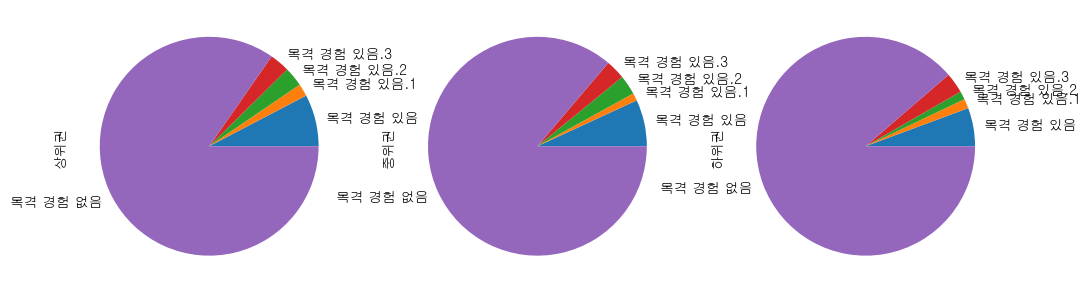

In [139]:

plt.figure(figsize = (12,6))
plt.title('목격 여부 및 상황')
plt.subplot(1,3,1)
ssgrade.loc['상위권'].plot(kind = 'pie')
plt.subplot(1,3,2)
ssgrade.loc['중위권'].plot(kind = 'pie')
plt.subplot(1,3,3)
ssgrade.loc['하위권'].plot(kind = 'pie')

<Axes: ylabel='남녀공학'>

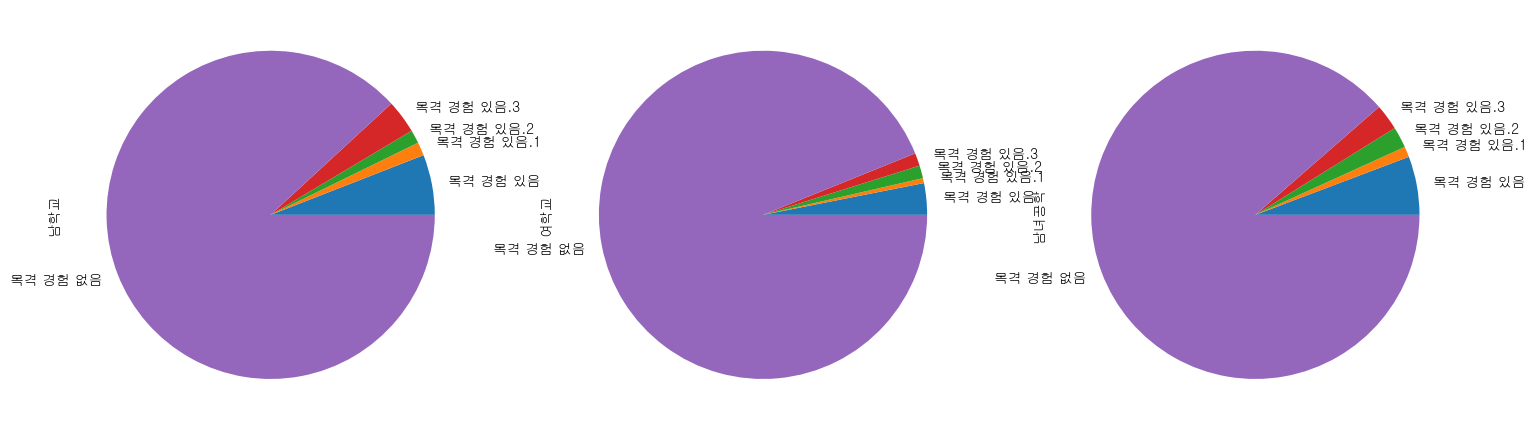

In [151]:
plt.figure(figsize = (18,18))
plt.subplot(1,3,1)
ssschoolkind.loc['남학교'].plot(kind = 'pie')
plt.subplot(1,3,2)
ssschoolkind.loc['여학교'].plot(kind = 'pie')
plt.subplot(1,3,3)
ssschoolkind.loc['남녀공학'].plot(kind = 'pie')

In [74]:
elementary = ssage.loc['초등학교'].astype('float64')
middle = ssage.loc['중학교'].astype('float64')
high = ssage.loc['고등학교'].astype('float64')

<Axes: ylabel='고등학교'>

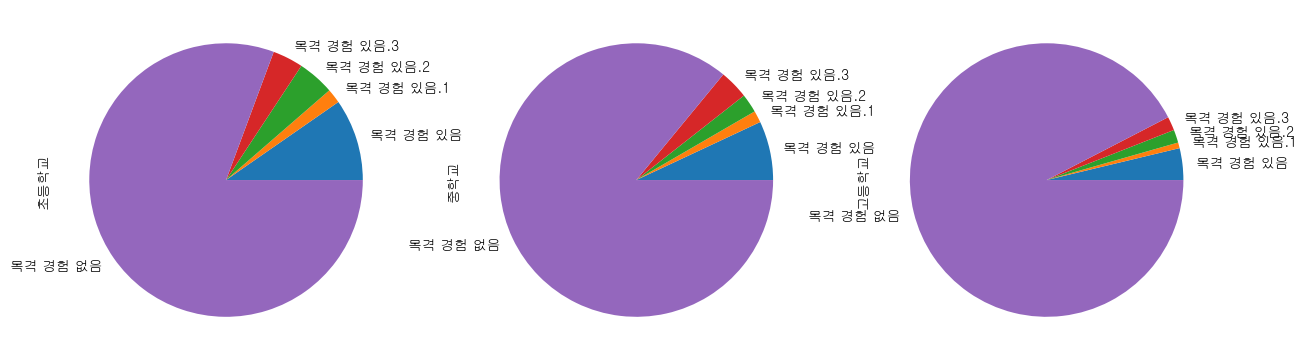

In [159]:
plt.figure(figsize = (15,15))
plt.subplot(1,3,1)
elementary.plot(kind = 'pie')
plt.subplot(1,3,2)
middle.plot(kind = 'pie')
plt.subplot(1,3,3)
high.plot(kind = 'pie')

<hr>

In [125]:
#목격 경험 : kind_student
age = select(kind_student, '학령별')
schoolkind = select(kind_student, '학교특성별')
grade = select(kind_student, '학업성적별')

Text(0.5, 1.0, '경험')

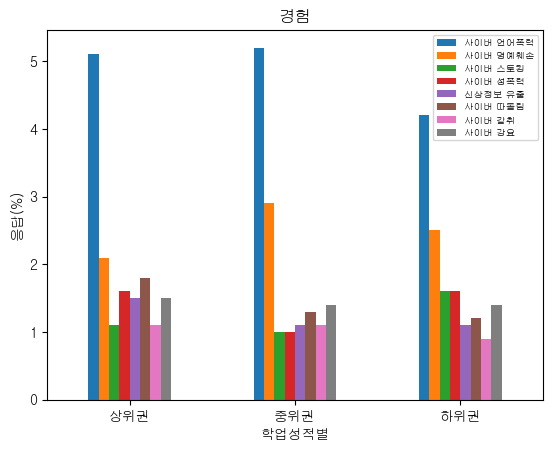

In [162]:
grade.plot(kind = 'bar', rot = 0, )
plt.xlabel('학업성적별')
plt.ylabel('응답(%)')
plt.legend(fontsize = 'x-small')
plt.title('경험')

Text(0.5, 1.0, '경험')

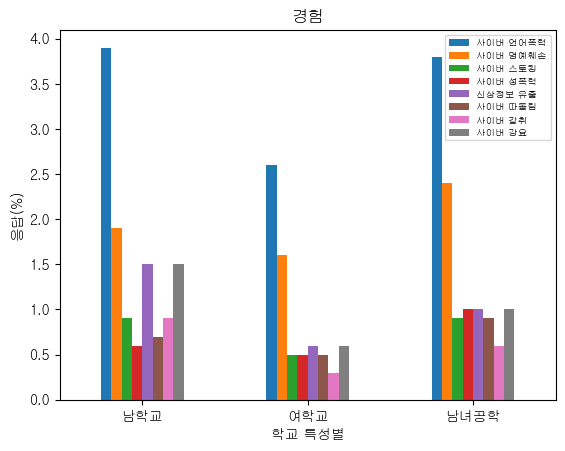

In [161]:
schoolkind.plot(kind = 'bar', rot = 0)
plt.xlabel('학교 특성별')
plt.ylabel('응답(%)')
plt.legend( fontsize = 'x-small')
plt.title('경험')

Text(0.5, 1.0, '경험')

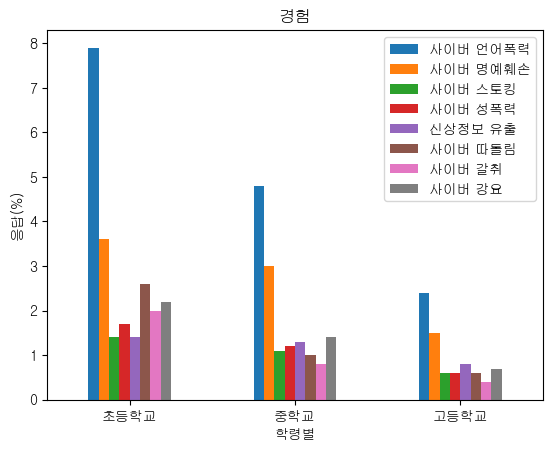

In [160]:
age.plot(kind = 'bar', rot = 0)
plt.xlabel('학령별')
plt.ylabel('응답(%)')
plt.title('경험')